In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [9]:
# load sdss spectroscopic data

file = '../../../data/spec_data/sdss_dr18_specobj.csv'

sdss = pd.read_csv( file, comment = '#', header = 0 )

# select objects with redshift > 0 and error < 0.1%
sdss = sdss.query( '(redshift >= 0) & (redshift_err < 0.001)' )

# magnitude error < 10%
sdss = sdss.query( ' & '.join([ f'(psf_{filt}_err < 0.1)' for filt in 'ugriz']) )

# drop error estimates
sdss = sdss.drop(columns = ['redshift_err'] + [ f'psf_{filt}_err' for filt in 'ugriz'])

# apply reddening to magnitudes and drop reddening values
for filt in 'ugriz':
    sdss[f'psf_{filt}'] = sdss[f'psf_{filt}'] - sdss[f'ext_{filt}']
sdss = sdss.drop(columns = [ f'ext_{filt}' for filt in 'ugriz'])

# calculate pairwise colours
filters = 'ugriz'
for i in range(5):
    for j in range(i+1, 5):
        sdss[f'{filters[i]}-{filters[j]}'] = sdss[f'psf_{filters[i]}'] - sdss[f'psf_{filters[j]}']

sdss = sdss.rename(columns = {'specObjID': 'obj_id', 'photoRa': 'ra', 'photoDec': 'dec', **{f'psf_{filt}': filt for filt in filters}})

sdss.head(5)

,obj_id,ra,dec,redshift,class,u,g,r,i,z,u-g,u-r,u-i,u-z,g-r,g-i,g-z,r-i,r-z,i-z
0,299574339840272384,145.340589,0.019173,0.120293,GALAXY,21.003185,19.249409,18.315363,17.833546,17.485308,1.753776,2.687822,3.169639,3.517877,0.934045,1.415863,1.764101,0.481817,0.830055,0.348238
4,299575439351900160,145.199319,-0.286251,0.651584,QSO,19.456431,19.073007,19.112139,18.989628,18.965669,0.383423,0.344292,0.466803,0.490762,-0.039132,0.083380,0.107338,0.122512,0.146470,0.023958
5,299575714229807104,145.281119,-0.330470,0.000111,STAR,19.109700,18.762770,18.923194,19.127551,19.279053,0.346930,0.186506,-0.017851,-0.169353,-0.160424,-0.364781,-0.516283,-0.204357,-0.355859,-0.151502
9,299577088619341824,145.167369,-0.482348,0.062374,GALAXY,20.793304,19.882460,19.428801,19.182535,19.099255,0.910844,1.364504,1.610769,1.694049,0.453660,0.699925,0.783206,0.246265,0.329546,0.083281
11,299577638375155712,145.213878,1.151698,1.961112,QSO,19.000741,18.947850,18.914694,18.770396,18.594489,0.052891,0.086047,0.230345,0.406252,0.033156,0.177454,0.353361,0.144298,0.320205,0.175907


In [10]:
# classification using magnitude and colours
df = sdss.drop(columns = ['obj_id', 'ra', 'dec', 'redshift'])

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
u,234150.0,16.778733,185.170555,-9999.728123,19.756920,20.426438,20.849192,28.841067
g,234150.0,15.574561,183.985735,-9999.456803,18.602324,19.078665,19.466255,22.071214
r,234150.0,15.762693,161.669050,-9999.297606,17.912041,18.424154,18.965759,21.303157
i,234150.0,15.290004,166.878678,-9999.234833,17.554425,18.083787,18.716605,21.184374
z,234150.0,14.824725,173.171666,-9999.164497,17.230165,17.794281,18.517533,20.470412
u-g,234150.0,1.204172,35.871135,-10020.247734,0.895871,1.298588,1.758626,10019.518147
u-r,234150.0,1.016040,90.261103,-10019.410033,1.209627,1.945655,2.595190,11.258257
u-i,234150.0,1.488729,90.261506,-10018.754079,1.423818,2.305726,2.977378,10019.873289
u-z,234150.0,1.954008,77.483254,-10018.460242,1.577589,2.605460,3.323557,10019.855766
g-r,234150.0,-0.188132,87.838298,-10019.383331,0.323297,0.646995,0.841428,3.414607


/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/d

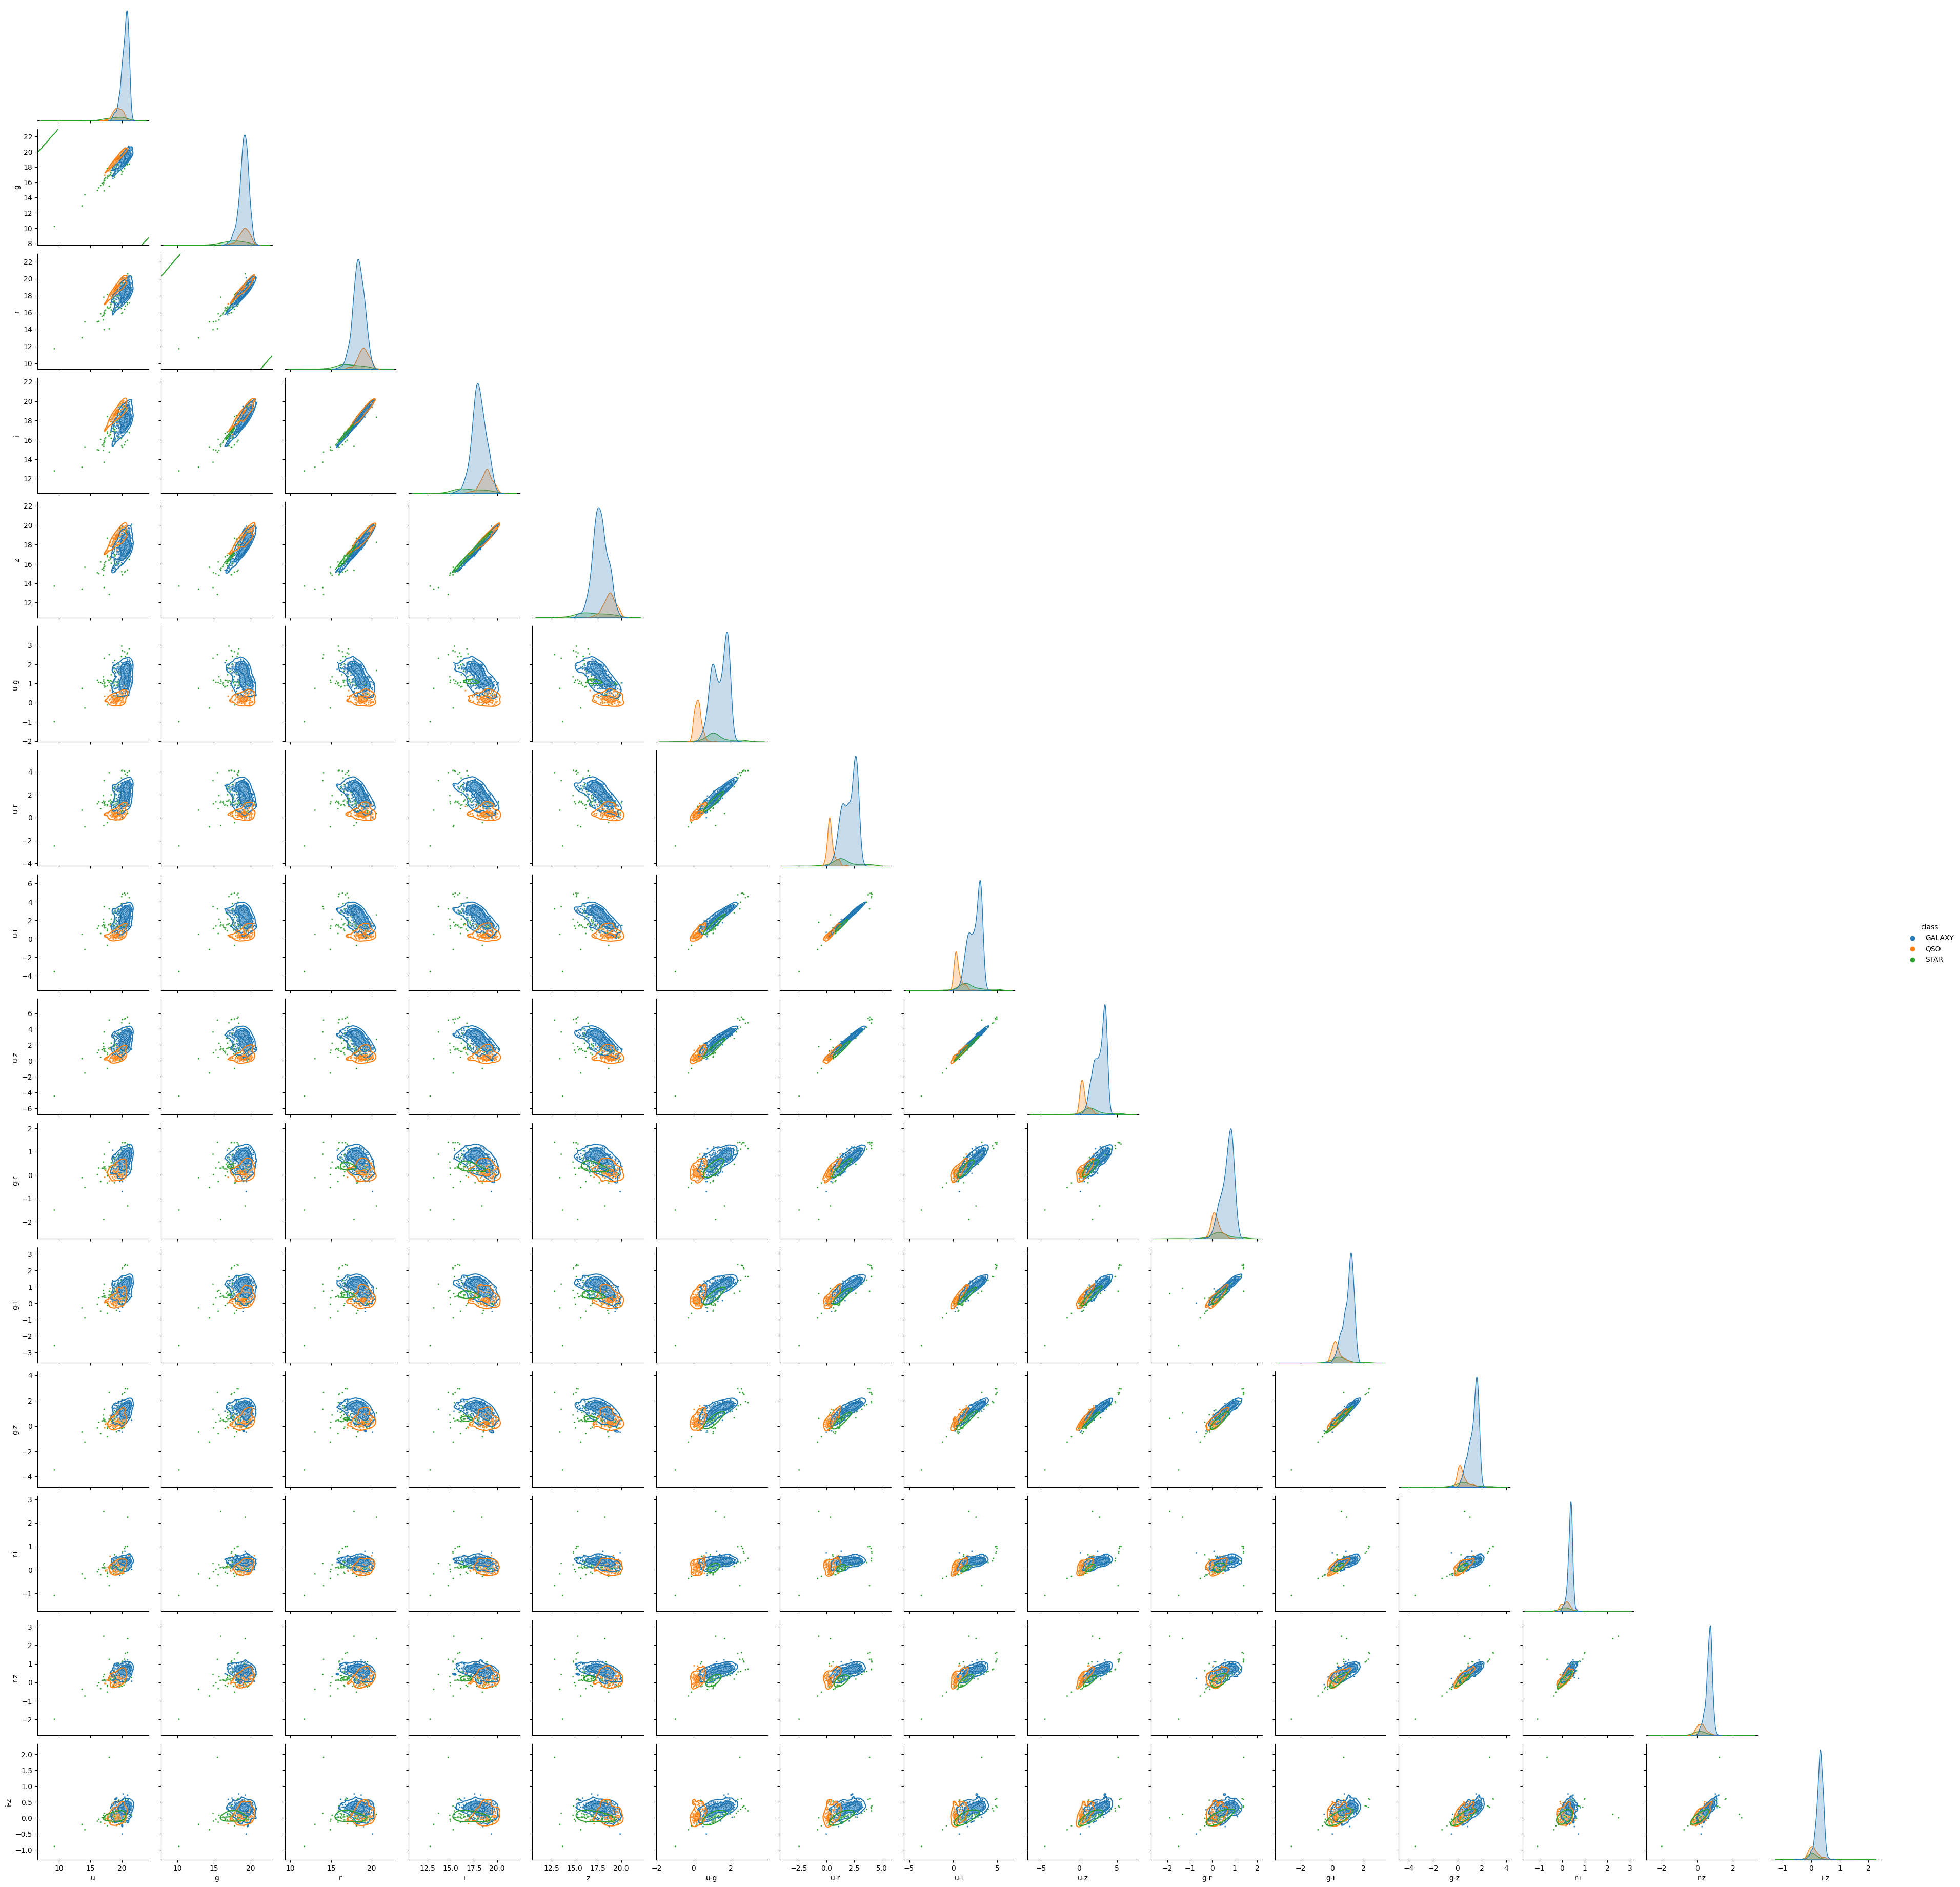

In [12]:
g = sbn.pairplot(df.sample(n = 1000, random_state = 0), 
                 hue = 'class', 
                 corner = True, 
                 diag_kind = 'kde', 
                 plot_kws = {'s': 5},
                 )
g.map_lower(sbn.kdeplot, levels = 4, color = '.2')

In [13]:
import tensorflow as tf

2023-05-15 13:46:09.249723: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-15 13:46:09.251575: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 13:46:09.287867: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 13:46:09.288368: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 13:46:10.015684: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [14]:
# input feature: colour and i-magnitude
x = df.drop(columns = ['class'])

# output label: class 
y = pd.get_dummies(df['class'], dtype = 'int')

In [15]:
# split to test and train sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size = 0.1, random_state = 0)

In [16]:
# create model

# normalising input features
norm_layer = tf.keras.layers.Normalization(axis = 1)
norm_layer.adapt( x_train )

# sequential model
model = tf.keras.Sequential([norm_layer,
                             tf.keras.layers.Dense(128, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax'),
                            ])

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'],
            )

2023-05-15 13:46:49.116407: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [17]:
# training

checkpt_path = './tmp/checkpoint_2'
model_checkpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpt_path,
                                                            save_weights_only = True,
                                                            save_best_only = True,
                                                            monitor = 'val_accuracy',
                                                            mode = 'max',
                                                            )

history = model.fit(x_train, 
                    y_train,
                    validation_split = 0.2,
                    epochs = 50,
                    verbose = 1,
                    callbacks = [model_checkpt_callback, ],
                    use_multiprocessing = True,
                    workers = 32,
                )

_ = model.load_weights(checkpt_path) # load saved best model

Epoch 1/50
5269/5269 [==============================] - 12s 2ms/step - loss: 0.6595 - accuracy: 0.8990 - val_loss: 0.4952 - val_accuracy: 0.9256
Epoch 2/50
5269/5269 [==============================] - 10s 2ms/step - loss: 0.4170 - accuracy: 0.9335 - val_loss: 0.3257 - val_accuracy: 0.9363
Epoch 3/50
5269/5269 [==============================] - 13s 3ms/step - loss: 0.3879 - accuracy: 0.9389 - val_loss: 0.2391 - val_accuracy: 0.9391
Epoch 4/50
5269/5269 [==============================] - 12s 2ms/step - loss: 0.3321 - accuracy: 0.9403 - val_loss: 0.2393 - val_accuracy: 0.9390
Epoch 5/50
5269/5269 [==============================] - 12s 2ms/step - loss: 0.2996 - accuracy: 0.9417 - val_loss: 0.2242 - val_accuracy: 0.9401
Epoch 6/50
5269/5269 [==============================] - 12s 2ms/step - loss: 0.2594 - accuracy: 0.9431 - val_loss: 0.2202 - val_accuracy: 0.9407
Epoch 7/50
5269/5269 [==============================] - 13s 3ms/step - loss: 0.2474 - accuracy: 0.9443 - val_loss: 0.2340 - val_ac

Text(0, 0.5, 'Accuracy')

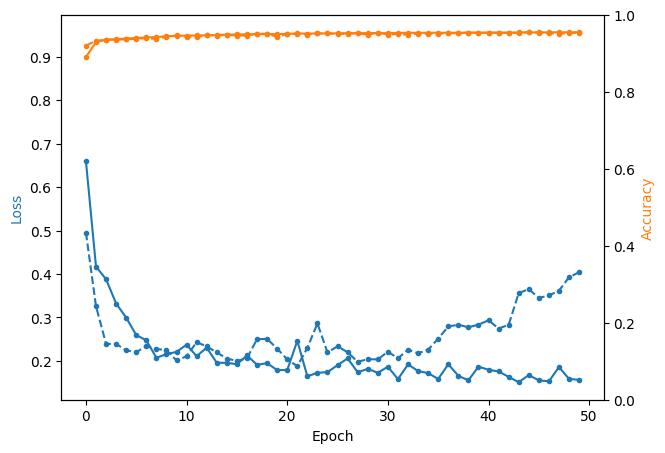

In [18]:
fig, ax1 = plt.subplots(figsize = [7, 5])
ax2 = ax1.twinx()

ax1.plot(history.history['loss'], 'o-', ms = 3, color = 'C0')
ax1.plot(history.history['val_loss'], 'o--', ms = 3, color = 'C0')

ax1.plot(history.history['accuracy'], 'o-', ms = 3, color = 'C1')
ax1.plot(history.history['val_accuracy'], 'o--', ms = 3, color = 'C1')

ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss', color = 'C0')
ax2.set_ylabel('Accuracy', color = 'C1')

In [19]:
# test accuracy
score = model.evaluate(x_test, y_test, verbose = 1)

print(f'test accuracy: {score[1]:.3f}')

732/732 [==============================] - 1s 1ms/step - loss: 0.2255 - accuracy: 0.9552
test accuracy: 0.955


7318/7318 [==============================] - 11s 1ms/step


/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/darkmatter/Documents/ms3/python/lib/python3.9/site-packages/seaborn/d

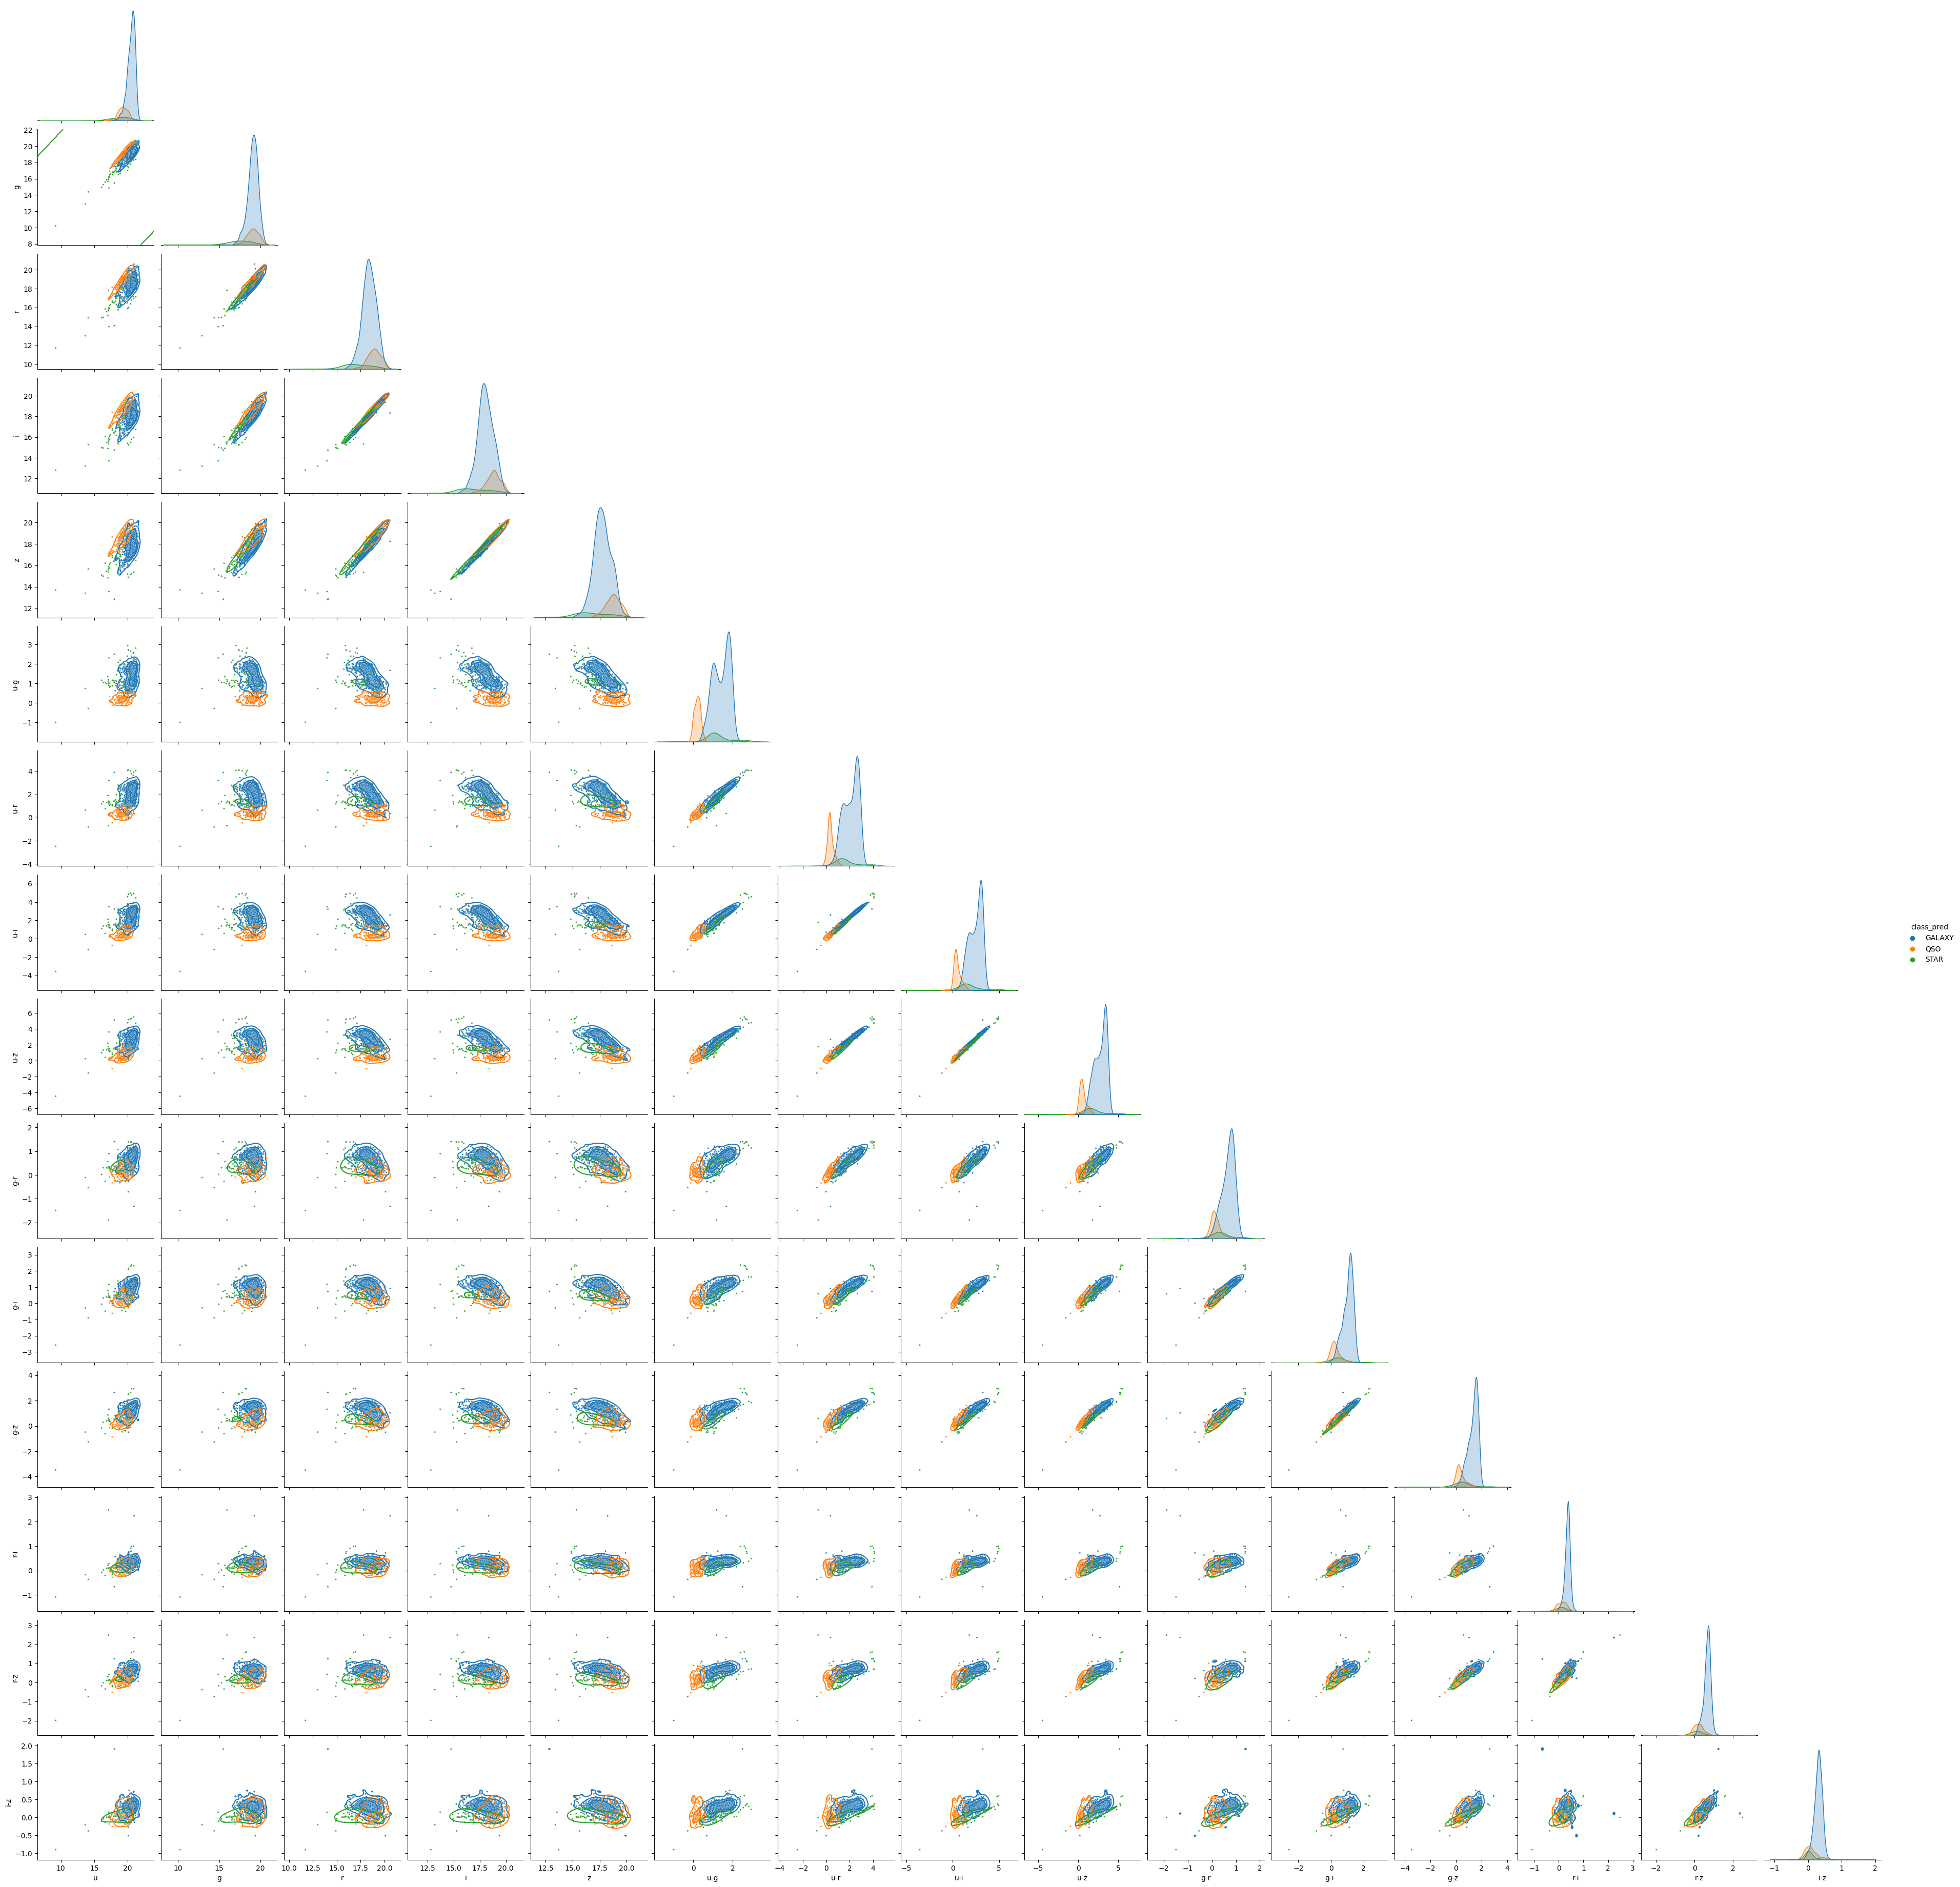

In [20]:
df2 = df.drop(columns = ['class'])

y_pred = model.predict( df2.to_numpy() )
df2['class_pred'] = y_pred.argmax(1)
df2['class_pred'] = df2['class_pred'].map( dict( zip( range(3), y.columns ) ) )

g = sbn.pairplot(df2.sample(n = 1000, random_state = 0), 
                 hue = 'class_pred', 
                 corner = True, 
                 diag_kind = 'kde', 
                 plot_kws = {'s': 5},
                 )
g.map_lower(sbn.kdeplot, levels = 4, color = '.2')